# 装载预训练的词向量
* 该矩阵由 GloVe 进行训练得到。矩阵将包含 400000 个词向量，每个向量的维数为 50。

In [1]:
import numpy as np
wordsList = np.load('./data/wordsList.npy')
print('Loaded the word list!')
wordsList = wordsList.tolist() #Originally loaded as numpy array
wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
wordVectors = np.load('./data/wordVectors.npy')
print ('Loaded the word vectors!')

Loaded the word list!
Loaded the word vectors!


In [3]:
wordsList[:5]

['0', ',', '.', 'of', 'to']

In [4]:
print(len(wordsList))
print(wordVectors.shape)

400000
(400000, 50)


* 根据单词找到index再找到词向量

In [5]:
goodindex = wordsList.index('good')
wordVectors[goodindex]

array([-3.5586e-01,  5.2130e-01, -6.1070e-01, -3.0131e-01,  9.4862e-01,
       -3.1539e-01, -5.9831e-01,  1.2188e-01, -3.1943e-02,  5.5695e-01,
       -1.0621e-01,  6.3399e-01, -4.7340e-01, -7.5895e-02,  3.8247e-01,
        8.1569e-02,  8.2214e-01,  2.2220e-01, -8.3764e-03, -7.6620e-01,
       -5.6253e-01,  6.1759e-01,  2.0292e-01, -4.8598e-02,  8.7815e-01,
       -1.6549e+00, -7.7418e-01,  1.5435e-01,  9.4823e-01, -3.9520e-01,
        3.7302e+00,  8.2855e-01, -1.4104e-01,  1.6395e-02,  2.1115e-01,
       -3.6085e-02, -1.5587e-01,  8.6583e-01,  2.6309e-01, -7.1015e-01,
       -3.6770e-02,  1.8282e-03, -1.7704e-01,  2.7032e-01,  1.1026e-01,
        1.4133e-01, -5.7322e-02,  2.7207e-01,  3.1305e-01,  9.2771e-01],
      dtype=float32)

* 根据句子构造它的向量表示。为了得到词向量，我们可以使用 TensorFlow 的嵌入函数。这个函数有两个参数，一个是嵌入矩阵（在我们的情况下是词向量矩阵），另一个是每个词对应的索引。

In [6]:
import tensorflow as tf
maxSeqLength = 10 #Maximum length of sentence
numDimensions = 50 #Dimensions for each word vector
firstSentence = np.zeros((maxSeqLength), dtype='int32')
firstSentence[0] = wordsList.index("i")
firstSentence[1] = wordsList.index("thought")
firstSentence[2] = wordsList.index("the")
firstSentence[3] = wordsList.index("movie")
firstSentence[4] = wordsList.index("was")
firstSentence[5] = wordsList.index("incredible")
firstSentence[6] = wordsList.index("and")
firstSentence[7] = wordsList.index("inspiring")
print(firstSentence.shape)
print(firstSentence) #Shows the row index for each word

c:\users\adsss\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(10,)
[    41    804 201534   1005     15   7446      5  13767      0      0]


* 根据索引号，从词向量矩阵中找到该句子向量。

In [7]:
with tf.Session() as sess:
    print(tf.nn.embedding_lookup(wordVectors,firstSentence).eval().shape)#embedding_lookup就是从向量矩阵中找到那个需要的

(10, 50)


# 设置最大单词数

In [8]:
from os import listdir
from os.path import isfile, join
#构建所有在train数据里的所有评论路径
positiveFiles = ['./data/train/pos/' + f for f in listdir('./data/train/pos/') if isfile(join('./data/train/pos/', f))]
negativeFiles = ['./data/train/neg/' + f for f in listdir('./data/train/neg/') if isfile(join('./data/train/neg/', f))]
numWords = []
for pf in positiveFiles:
    with open(pf, "r", encoding='utf-8') as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)       
print('Positive files finished')

for nf in negativeFiles:
    with open(nf, "r", encoding='utf-8') as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)  
print('Negative files finished')

numFiles = len(numWords)
print('The total number of files is', numFiles)
print('The total number of words in the files is', sum(numWords))
print('The average number of words in the files is', sum(numWords)/len(numWords))

Positive files finished
Negative files finished
The total number of files is 25000
The total number of words in the files is 5844680
The average number of words in the files is 233.7872


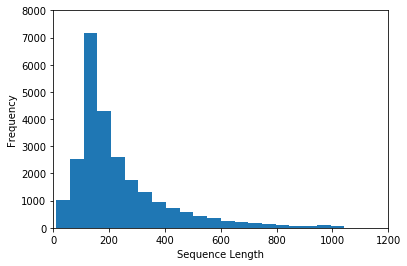

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(numWords, 50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axis([0, 1200, 0, 8000])
plt.show()

* 从直方图和句子的平均单词数，我们认为将句子最大长度设置为 250 是可行的。

In [14]:
maxSeqLength = 250

* 接下来，让我们看看如何将单个文件中的文本转换成索引矩阵，比如下面的代码就是文本中的其中一个评论。

In [15]:
fname = positiveFiles[363] 
with open(fname, "r", encoding= 'utf-8') as f:
    for lines in f:
        print(lines)
        exit

Given the title, this first follow-up to QUARTET (1948) obviously reduces the number of W. Somerset Maugham stories which comprise the film. The author still turns up to introduce the episodes, but there’s no epilogue this time around; by the way, while the script of the original compendium gave sole credit to R.C. Sheriff, here Maugham himself also lent a hand in the adaptation, as well as Noel Langley (though it’s unclear whether they contributed one segment each or else worked in unison). As can be expected, much of the crew of QUARTET has been retained for the second installment – though this also extends to at least three cast members, namely Naunton Wayne, Wilfrid Hyde-White and Felix Aylmer (the last two had bit parts in the episode from QUARTET entitled “The Colonel’s Lady”). While TRIO ultimately emerges to be a lesser achievement than its predecessor (slightly unbalanced by the third story which takes up more than half the running-time), it’s still done with the utmost care, 

接下来，我们将它转换成一个索引矩阵。

In [16]:
# 删除标点符号、括号、问号等，只留下字母数字字符
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

In [17]:
firstFile = np.zeros((maxSeqLength), dtype='int32')
with open(fname,'r',encoding='utf-8') as f:
    indexCounter = 0
    line=f.readline()
    cleanedLine = cleanSentences(line)
    split = cleanedLine.split()
    for word in split:
        try:
            firstFile[indexCounter] = wordsList.index(word)
        except ValueError:
            firstFile[indexCounter] = 399999 #Vector for unkown words
        indexCounter = indexCounter + 1
        if indexCounter >= maxSeqLength:
            break
firstFile

array([   454, 201534,    698,     37,     58,  55074,      4,   7623,
         4016,   3414,  10588, 201534,    223,      3,   5140,  10713,
        61817,   1562,     42,  11776, 201534,    319, 201534,   1715,
          149,   2919,     60,      4,   5354, 201534,   3855,     34,
       123797,     84,  36320,     37,     79,    204,     21, 201534,
          179,    110, 201534,   5230,      3, 201534,    929,  33053,
          646,   5153,   1164,      4,  29990,   5389,    187,  61817,
          670,     52,  11604,      7,    823,      6, 201534,   7175,
           19,    143,     19,  13188,  23027,    413,     47,   3691,
          401,     39,   1777,     48,   6118,    236,     46,   1726,
          762,      6,  26797,     19,     86,     30,    287,    181,
            3, 201534,   1694,      3,   7623,     31,     51,   5368,
           10, 201534,    126,  13702,    413,     37,     52,   7572,
            4,     22,    338,     87,   1784,    235,   7476, 263907,
      

# 将评论转为矩阵
现在，我们用相同的方法来处理全部的 25000 条评论。我们将导入电影训练集，并且得到一个 25000 * 250 的矩阵。这是一个计算成本非常高的过程，可以直接使用理好的索引矩阵文件。

In [18]:
ids = np.zeros((numFiles, maxSeqLength), dtype='int32')
fileCounter = 0
for pf in positiveFiles:
    with open(pf,'r',encoding='utf-8') as f:
        indexCounter = 0
        line=f.readline()
        cleanedLine = cleanSentences(line)
        split = cleanedLine.split()
        for word in split:
            try:
                ids[fileCounter][indexCounter] = wordsList.index(word)
            except ValueError:
                ids[fileCounter][indexCounter] = 399999 #Vector for unkown words
            indexCounter = indexCounter + 1
            if indexCounter >= maxSeqLength:
                break
        fileCounter = fileCounter + 1
        if fileCounter%1000==0:
            print("we have processed %d data"%fileCounter)

for nf in negativeFiles:
    with open(nf, "r",encoding='utf-8') as f:
        indexCounter = 0
        line=f.readline()
        cleanedLine = cleanSentences(line)
        split = cleanedLine.split()
        for word in split:
            try:
                ids[fileCounter][indexCounter] = wordsList.index(word)
            except ValueError:
                ids[fileCounter][indexCounter] = 399999 #Vector for unkown words
            indexCounter = indexCounter + 1
            if indexCounter >= maxSeqLength:
                break
        fileCounter = fileCounter + 1 
        if fileCounter%1000==0:
            print("we have processed %d data"%fileCounter)
np.save('idsMatrix', ids)

we have processed 1000 data
we have processed 2000 data
we have processed 3000 data
we have processed 4000 data
we have processed 5000 data
we have processed 6000 data
we have processed 7000 data
we have processed 8000 data
we have processed 9000 data
we have processed 10000 data
we have processed 11000 data
we have processed 12000 data
we have processed 13000 data
we have processed 14000 data
we have processed 15000 data
we have processed 16000 data
we have processed 17000 data
we have processed 18000 data
we have processed 19000 data
we have processed 20000 data
we have processed 21000 data
we have processed 22000 data
we have processed 23000 data
we have processed 24000 data
we have processed 25000 data


In [2]:
ids = np.load('idsMatrix.npy')

In [3]:
from random import randint

def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        if (i % 2 == 0): 
            num = randint(1,11499)
            labels.append([1,0])
        else:
            num = randint(13499,24999)
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(11499,13499)
        if (num <= 12499):
            labels.append([1,0])
        else:
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

# LSTM

In [9]:
batchSize = 24
lstmUnits = 64
numClasses = 2
numDimensions = 50
iterations = 50000
maxSeqLength = 250

In [10]:
import tensorflow as tf
tf.reset_default_graph()
with tf.name_scope('input'):
    labels = tf.placeholder(tf.float32, [batchSize, numClasses])
    input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

In [11]:
with tf.name_scope('embedding'):
    data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
    data = tf.nn.embedding_lookup(wordVectors,input_data)

In [12]:
with tf.name_scope('lstm'):
    lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
    lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
    value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)
    with tf.name_scope('weight'):
        weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
    with tf.name_scope('bias'):
        bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
    value = tf.transpose(value, [1, 0, 2])
    #取最终的结果值
    last = tf.gather(value, int(value.get_shape()[0]) - 1)
    prediction = (tf.matmul(last, weight) + bias)

Instructions for updating:
Use the retry module or similar alternatives.


In [13]:
with tf.name_scope('accuracy'):
    with tf.name_scope('correct_prediction'):
        correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))
    tf.summary.scalar('accuracy',accuracy)

In [14]:
with tf.name_scope('cross_entropy'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
    tf.summary.scalar('cross_entropy',loss)
with tf.name_scope('train'):
    optimizer = tf.train.AdamOptimizer().minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [15]:
merged = tf.summary.merge_all()

In [16]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
summary_writer=tf.summary.FileWriter('./log/dir',sess.graph)
sess.run(tf.global_variables_initializer())

for i in range(iterations):
    #Next Batch of reviews
    nextBatch, nextBatchLabels = getTrainBatch();
    summary,_ = sess.run([merged,optimizer],feed_dict={input_data: nextBatch, labels: nextBatchLabels}) 
    summary_writer.add_summary(summary,i)
        
    #Save the network every 10,000 training iterations
    if (i % 10000 == 0 and i != 0):
        save_path = saver.save(sess, "models/pretrained_lstm.ckpt", global_step=i)
        print("saved to %s" % save_path)

saved to models/pretrained_lstm.ckpt-10000
saved to models/pretrained_lstm.ckpt-20000
saved to models/pretrained_lstm.ckpt-30000
saved to models/pretrained_lstm.ckpt-40000


In [17]:
iterations = 10
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch();
    print("Accuracy for this batch:", (sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels})) * 100)

Accuracy for this batch: 95.83333134651184
Accuracy for this batch: 87.5
Accuracy for this batch: 91.66666865348816
Accuracy for this batch: 91.66666865348816
Accuracy for this batch: 79.16666865348816
Accuracy for this batch: 87.5
Accuracy for this batch: 79.16666865348816
Accuracy for this batch: 83.33333134651184
Accuracy for this batch: 83.33333134651184
Accuracy for this batch: 75.0
